## 数据导入及处理

In [1]:
from feature_selector import FeatureSelector
import pandas as pd
import numpy as np

In [2]:
train = pd.read_table('vehicle.dat',sep=' ',names=['COMPACTNESS','CIRCULARITY','DISTANCE CIRCULARITY','RADIUS RATIO','PR.AXIS ASPECT RATIO','MAX.LENGTH ASPECT RATIO' ,'SCATTER RATIO','ELONGATEDNESS','PR.AXIS RECTANGULARITY','MAX.LENGTH RECTANGULARITY','SCALED VARIANCE(MAJOR AXIS)','SCALED VARIANCE(MINOR AXIS)','SCALED RADIUS OF GYRATION','SKEWNESS ABOUT(MAJOR AXIS)','SKEWNESS ABOUT(MINOR AXIS)','KURTOSIS ABOUT(MINOR AXIS)','KURTOSIS ABOUT(MAJOR AXIS))','HOLLOWS RATIO','classes'])

In [3]:
classes = list(np.unique(train.classes))
train.classes.replace(classes, list(np.arange(len(classes))), inplace=True)

In [4]:
train_labels = train['classes']
train.head()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE(MAJOR AXIS),SCALED VARIANCE(MINOR AXIS),SCALED RADIUS OF GYRATION,SKEWNESS ABOUT(MAJOR AXIS),SKEWNESS ABOUT(MINOR AXIS),KURTOSIS ABOUT(MINOR AXIS),KURTOSIS ABOUT(MAJOR AXIS)),HOLLOWS RATIO,classes
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0


In [5]:
train = train.drop(columns = ['classes'])

## 缺失值统计

In [6]:
fs = FeatureSelector(data = train, labels = train_labels)

In [7]:
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



## 单一唯一值统计

In [8]:
fs.identify_single_unique()

0 features with a single unique value.



## 高度相关属性统计

In [9]:
fs.identify_collinear(correlation_threshold=0.95)

5 features with a correlation magnitude greater than 0.95.



In [10]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['ELONGATEDNESS',
 'PR.AXIS RECTANGULARITY',
 'MAX.LENGTH RECTANGULARITY',
 'SCALED VARIANCE(MAJOR AXIS)',
 'SCALED VARIANCE(MINOR AXIS)']

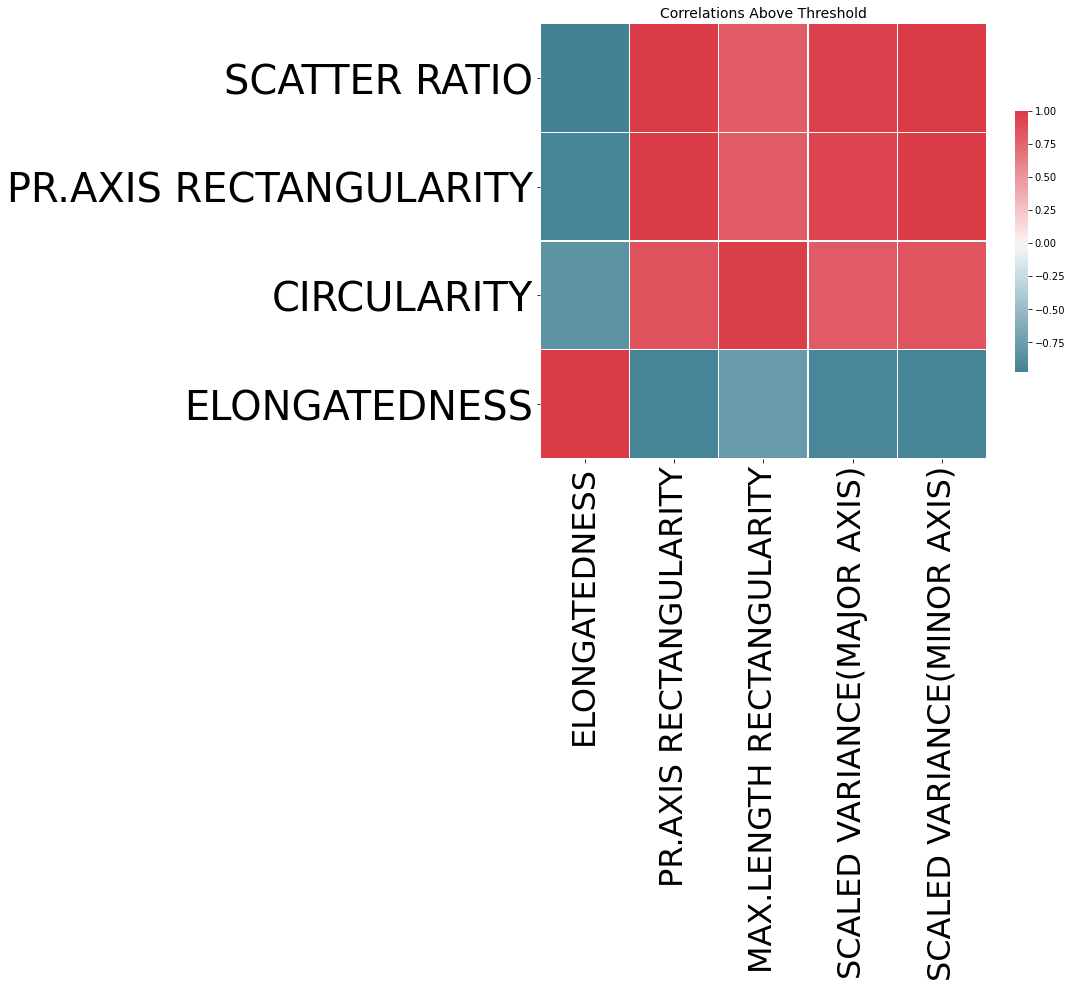

In [11]:
fs.plot_collinear()

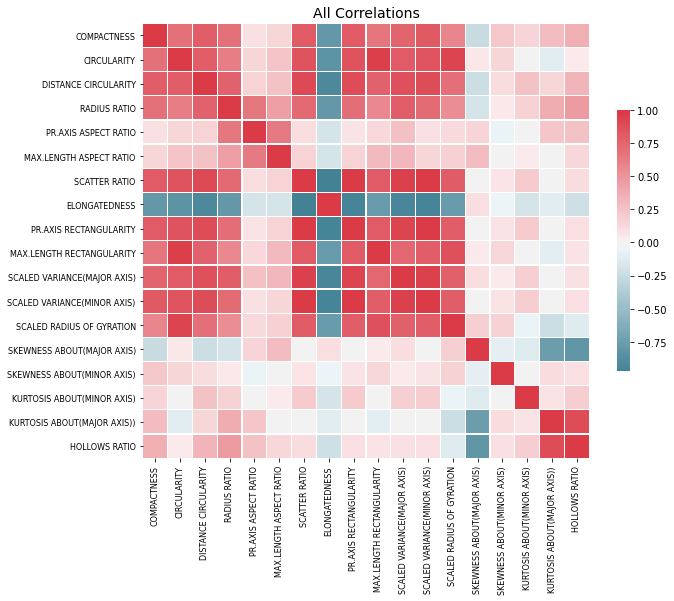

In [12]:
fs.plot_collinear(plot_all=True)

In [13]:
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,ELONGATEDNESS,SCATTER RATIO,-0.973385
1,PR.AXIS RECTANGULARITY,SCATTER RATIO,0.992088
2,PR.AXIS RECTANGULARITY,ELONGATEDNESS,-0.950512
3,MAX.LENGTH RECTANGULARITY,CIRCULARITY,0.965776
4,SCALED VARIANCE(MAJOR AXIS),SCATTER RATIO,0.951862


## 零重要性属性统计

In [14]:
fs.identify_zero_importance(task = 'regression', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[115]	valid_0's auc: 1	valid_0's l2: 0.228575
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 1	valid_0's l2: 0.257574
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 0.997743	valid_0's l2: 0.237577
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.994197	valid_0's l2: 0.214485
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[8]	valid_0's auc: 1	valid_0's l2: 0.681107
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[4]	valid_0's auc: 1	valid_0's l2: 0.962724
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17

## 绘制特征的重要性图表

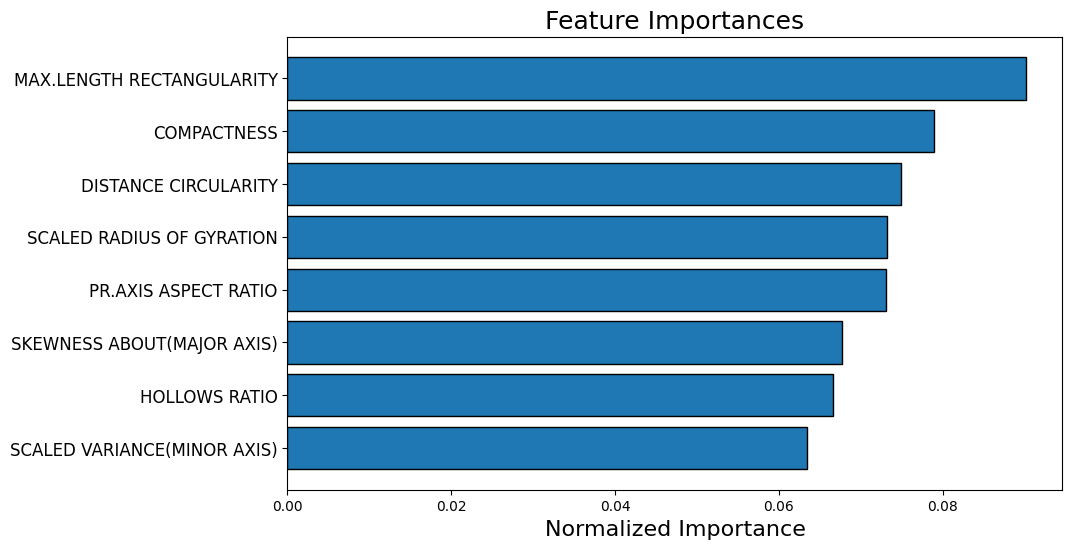

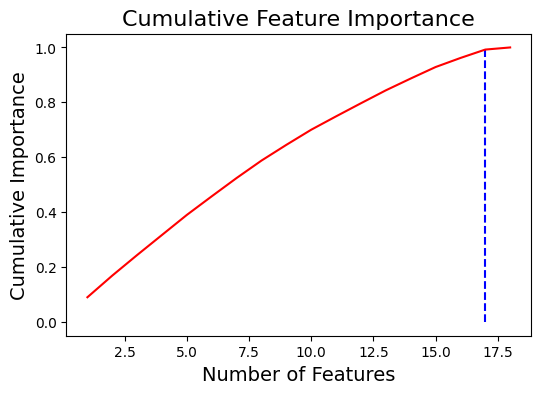

17 features required for 0.99 of cumulative importance


In [15]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 8)

In [16]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,MAX.LENGTH RECTANGULARITY,139.7,0.090129,0.090129
1,COMPACTNESS,122.3,0.078903,0.169032
2,DISTANCE CIRCULARITY,116.1,0.074903,0.243935
3,SCALED RADIUS OF GYRATION,113.4,0.073161,0.317097
4,PR.AXIS ASPECT RATIO,113.2,0.073032,0.390129
5,SKEWNESS ABOUT(MAJOR AXIS),104.9,0.067677,0.457806
6,HOLLOWS RATIO,103.3,0.066645,0.524452
7,SCALED VARIANCE(MINOR AXIS),98.4,0.063484,0.587935
8,KURTOSIS ABOUT(MAJOR AXIS)),88.8,0.057290,0.645226
9,KURTOSIS ABOUT(MINOR AXIS),85.4,0.055097,0.700323


In [17]:
one_hundred_features = list(fs.feature_importances.loc[:8, 'feature'])
len(one_hundred_features)

9

## 特征删除

In [18]:
fs.identify_low_importance(cumulative_importance = 0.99)

16 features required for cumulative importance of 0.99 after one hot encoding.
2 features do not contribute to cumulative importance of 0.99.



In [19]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['ELONGATEDNESS', 'PR.AXIS RECTANGULARITY']

In [20]:
all_to_remove = fs.check_removal()
all_to_remove[:10]

Total of 5 features identified for removal


['ELONGATEDNESS',
 'PR.AXIS RECTANGULARITY',
 'MAX.LENGTH RECTANGULARITY',
 'SCALED VARIANCE(MAJOR AXIS)',
 'SCALED VARIANCE(MINOR AXIS)']

In [21]:
train_removed = fs.remove(methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 5 features.


In [22]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 5 features including one-hot features.


In [23]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 18
Final Number of Features:  13
